#### Imports

In [1]:
import numpy as np

import pylab as plt

import matplotlib.pyplot as plt

#### function to plot matrix

In [2]:
def plot_matrix(R):
    fig, ax = plt.subplots()

    min_val, max_val = -1, 100

    ax.matshow(R, cmap=plt.cm.YlGnBu,aspect='auto')

    for i in range(MATRIX_SIZE):
        for j in range(MATRIX_SIZE):
            c = R[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

#### List of edges which are connected  
 (a,b) indicates there is a edge which connects point a to point b

In [3]:
edge_list = [(1,2), (1,3), (1,4),
             (2,6), (2,6),(2,7),(2,8),
             (3,8),(3,9),(3,4),(4,5),(4,9),
             (5,10),(5,11),
             (6,12),
             (7,13),
             (8,12),
             (9,11),
             (10,11),
             (11,14),
             (12,14),
             (13,14)]

In [4]:
reachable_nodes = [2,4,7,9,10,11,12]
obstacle_nodes = [3,5,6,8,13]

<img src="q-learning.png">

### Reward Matrix of graph
There is total 14 points 1 to 14 . point 0 is not connected to anyone.<br> Reward matrix created and initialized with -1 reward.
**R** is the *Reward Matrix.*

In [5]:
MATRIX_SIZE = 15

R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#### Plotting Reward Matrix

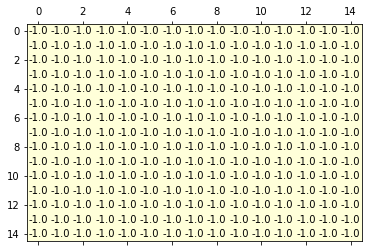

In [6]:
plot_matrix(R)

setting goal point to be point no.14

In [7]:
goal = 14

initializing reward matrix

In [8]:
for point in edge_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

add reward to goal point round trip

In [9]:
R[goal,goal]= 100

Reward Matrix after initialization

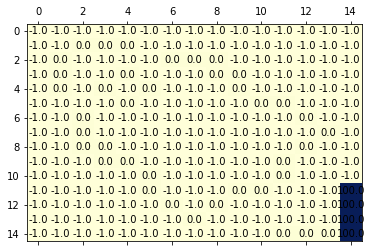

In [10]:
plot_matrix(R)

 Initializing Q matrix

In [11]:
good_enviornment = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
bad_enviornment = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

learning parameter

In [12]:
gamma = 0.8

setting start node to be 1

In [13]:
initial_state = 1

available actions possible given a state

In [14]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act



choosing one of action from a list  of actions

In [15]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action


check whether a node is reachable or obstacle

In [16]:
def collect_environmental_data(action):
    found = []
    if action in reachable_nodes:
        found.append('+')

    if action in obstacle_nodes:
        found.append('-')
    return (found)

update Q-Table given a (state,action) pair and update enviornment Tables.<br>
**viz.** good_enviornment and bad_enviornment table

In [17]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
    
    environment = collect_environmental_data(action)
     
    print('enviornment = ',environment)
    if '+' in environment:
        good_enviornment[current_state, action] += 0.01

    if '-' in environment:
        bad_enviornment[current_state, action] += 5


  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    

### Training for the first time where *Enviornmental Factors* does not contribute

In [18]:

scores = []
for i in range(1200):
    current_state = np.random.randint(0, int(Q.shape[0]))
    
    if current_state == 0 : # we dont have node named 0
        continue
        
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print('........................................................................')
    print('current state -> ',current_state)
    print('available action ->',available_act)
    print('action ->',action)
    
    print ('Score:', str(score))
    print('........................................................................')
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
enviornment =  ['-']
........................................................................
current state ->  12
available action -> [ 6  8 14]
action -> 6
Score: 0
........................................................................
max_value 0.0
enviornment =  ['+']
........................................................................
current state ->  4
available action -> [1 3 5 9]
action -> 9
Score: 0
........................................................................
max_value 0.0
enviornment =  ['+']
........................................................................
current state ->  5
available action -> [ 4 10 11]
action -> 4
Score: 0
........................................................................
max_value 0.0
enviornment =  ['-']
........................................................................
current state ->  7
available action -> [ 2 13]
action -> 13
Score: 0
...............................................................

Score: 588.6196127420362
........................................................................
max_value 0.0
enviornment =  ['+']
........................................................................
current state ->  1
available action -> [2 3 4]
action -> 4
Score: 588.6196127420362
........................................................................
max_value 0.0
enviornment =  ['-']
........................................................................
current state ->  11
available action -> [ 5  9 10 14]
action -> 5
Score: 588.6196127420362
........................................................................
max_value 0.0
enviornment =  ['+']
........................................................................
current state ->  9
available action -> [ 3  4 11]
action -> 11
Score: 588.6196127420362
........................................................................
max_value 0.0
enviornment =  ['-']
..........................................................

current state ->  1
available action -> [2 3 4]
action -> 2
Score: 1127.4684371336596
........................................................................
max_value 124.89850880000004
enviornment =  []
........................................................................
current state ->  2
available action -> [1 6 7 8]
action -> 1
Score: 1163.7822236281422
........................................................................
max_value 79.93504563200004
enviornment =  ['-']
........................................................................
current state ->  10
available action -> [ 5 11]
action -> 5
Score: 1187.0230469846113
........................................................................
max_value 243.94240000000002
enviornment =  ['+']
........................................................................
current state ->  9
available action -> [ 3  4 11]
action -> 11
Score: 1187.0230469846113
.................................................................

Score: 1883.8468900133785
........................................................................
max_value 156.12313600000004
enviornment =  ['-']
........................................................................
current state ->  1
available action -> [2 3 4]
action -> 3
Score: 1883.8468900133785
........................................................................
max_value 124.89850880000004
enviornment =  ['-']
........................................................................
current state ->  2
available action -> [1 6 7 8]
action -> 8
Score: 1915.0619079822468
........................................................................
max_value 156.12313600000004
enviornment =  ['+']
........................................................................
current state ->  3
available action -> [1 4 8 9]
action -> 4
Score: 1929.1086660682377
........................................................................
max_value 220.12313600000004
enviornment =  ['-']
.

enviornment =  ['-']
........................................................................
current state ->  14
available action -> [11 12 13 14]
action -> 13
Score: 2200.6308028204976
........................................................................
max_value 320.09850880000005
enviornment =  ['+']
........................................................................
current state ->  14
available action -> [11 12 13 14]
action -> 12
Score: 2200.6308028204976
........................................................................
max_value 256.0788070400001
enviornment =  ['-']
........................................................................
current state ->  12
available action -> [ 6  8 14]
action -> 6
Score: 2200.6308028204976
........................................................................
max_value 140.87880704000005
enviornment =  []
........................................................................
current state ->  2
available action -> [1 6

action -> 2
Score: 2419.631268879601
........................................................................
max_value 223.27234920448007
enviornment =  ['-']
........................................................................
current state ->  8
available action -> [ 2  3 12]
action -> 3
Score: 2434.5911132815686
........................................................................
max_value 359.0904365056001
enviornment =  ['+']
........................................................................
current state ->  8
available action -> [ 2  3 12]
action -> 12
Score: 2514.5911132815686
........................................................................
max_value 348.8630456320001
enviornment =  ['+']
........................................................................
current state ->  10
available action -> [ 5 11]
action -> 11
Score: 2514.5911132815686
........................................................................
max_value 459.0904365056001
enviornme

max_value 191.3947542341551
enviornment =  []
........................................................................
current state ->  4
available action -> [1 3 5 9]
action -> 1
Score: 2618.594591189563
........................................................................
max_value 299.0543034908673
enviornment =  ['-']
........................................................................
current state ->  2
available action -> [1 6 7 8]
action -> 6
Score: 2627.79168931104
........................................................................
max_value 467.2723492044801
enviornment =  []
........................................................................
current state ->  12
available action -> [ 6  8 14]
action -> 14
Score: 2627.79168931104
........................................................................
max_value 293.8178793635841
enviornment =  ['-']
........................................................................
current state ->  12
available action

current state ->  5
available action -> [ 4 10 11]
action -> 11
Score: 2716.648105511562
........................................................................
max_value 299.0543034908673
enviornment =  ['+']
........................................................................
current state ->  13
available action -> [ 7 14]
action -> 7
Score: 2716.648105511562
........................................................................
max_value 373.8178793635841
enviornment =  ['+']
........................................................................
current state ->  6
available action -> [ 2 12]
action -> 12
Score: 2716.648105511562
........................................................................
max_value 373.8178793635841
enviornment =  ['-']
........................................................................
current state ->  14
available action -> [11 12 13 14]
action -> 13
Score: 2716.648105511562
.............................................................

Score: 2735.0005790154523
........................................................................
max_value 299.0543034908673
enviornment =  ['+']
........................................................................
current state ->  5
available action -> [ 4 10 11]
action -> 10
Score: 2735.0005790154523
........................................................................
max_value 239.24344279269386
enviornment =  ['+']
........................................................................
current state ->  6
available action -> [ 2 12]
action -> 2
Score: 2735.0005790154523
........................................................................
max_value 194.0758033873241
enviornment =  []
........................................................................
current state ->  3
available action -> [1 4 8 9]
action -> 1
Score: 2735.0005790154523
........................................................................
max_value 306.5947542341551
enviornment =  ['-']
.....

enviornment =  ['+']
........................................................................
current state ->  8
available action -> [ 2  3 12]
action -> 2
Score: 2711.56830977125
........................................................................
max_value 245.27580338732412
enviornment =  ['+']
........................................................................
current state ->  9
available action -> [ 3  4 11]
action -> 4
Score: 2712.801225961437
........................................................................
max_value 309.2758033873241
enviornment =  ['+']
........................................................................
current state ->  4
available action -> [1 3 5 9]
action -> 9
Score: 2713.349188712631
........................................................................
max_value 245.27580338732412
enviornment =  ['+']
........................................................................
current state ->  8
available action -> [ 2  3 12]
action

available action -> [ 5 11]
action -> 11
Score: 2745.28104039567
........................................................................
max_value 395.607369067448
enviornment =  ['+']
........................................................................
current state ->  6
available action -> [ 2 12]
action -> 12
Score: 2745.5031106236793
........................................................................
max_value 494.50921133431
enviornment =  []
........................................................................
current state ->  13
available action -> [ 7 14]
action -> 14
Score: 2745.5031106236793
........................................................................
max_value 315.607369067448
enviornment =  ['-']
........................................................................
current state ->  12
available action -> [ 6  8 14]
action -> 8
Score: 2746.3497533679656
........................................................................
max_value 494.50921

max_value 395.607369067448
enviornment =  ['+']
........................................................................
current state ->  8
available action -> [ 2  3 12]
action -> 12
Score: 2806.9424951283827
........................................................................
max_value 253.1887162031668
enviornment =  ['+']
........................................................................
current state ->  5
available action -> [ 4 10 11]
action -> 4
Score: 2806.9424951283827
........................................................................
max_value 252.48589525395843
enviornment =  ['-']
........................................................................
current state ->  4
available action -> [1 3 5 9]
action -> 3
Score: 2806.9424951283827
........................................................................
max_value 252.48589525395843
enviornment =  ['-']
........................................................................
current state ->  4
avail

current state ->  1
available action -> [2 3 4]
action -> 2
Score: 2811.8708164222617
........................................................................
max_value 316.48589525395846
enviornment =  ['+']
........................................................................
current state ->  4
available action -> [1 3 5 9]
action -> 9
Score: 2811.8708164222617
........................................................................
max_value 253.1887162031668
enviornment =  ['+']
........................................................................
current state ->  8
available action -> [ 2  3 12]
action -> 2
Score: 2811.8708164222617
........................................................................
max_value 495.607369067448
enviornment =  []
........................................................................
current state ->  13
available action -> [ 7 14]
action -> 14
Score: 2805.861902725258
....................................................................

max_value 253.1887162031668
enviornment =  ['+']
........................................................................
current state ->  3
available action -> [1 4 8 9]
action -> 4
Score: 2797.06500371937
........................................................................
max_value 316.48589525395846
enviornment =  ['-']
........................................................................
current state ->  10
available action -> [ 5 11]
action -> 5
Score: 2797.06500371937
........................................................................
max_value 253.75097296253344
enviornment =  ['+']
........................................................................
current state ->  1
available action -> [2 3 4]
action -> 2
Score: 2797.177963168955
........................................................................
max_value 398.2007783700268
enviornment =  ['+']
........................................................................
current state ->  10
available acti

current state ->  9
available action -> [ 3  4 11]
action -> 11
Score: 2810.1729428418466
........................................................................
max_value 498.2007783700268
enviornment =  []
........................................................................
current state ->  13
available action -> [ 7 14]
action -> 14
Score: 2807.726036899787
........................................................................
max_value 254.8484981568172
enviornment =  ['+']
........................................................................
current state ->  5
available action -> [ 4 10 11]
action -> 4
Score: 2808.0591921307123
........................................................................
max_value 254.8484981568172
enviornment =  ['-']
........................................................................
current state ->  9
available action -> [ 3  4 11]
action -> 3
Score: 2808.0591921307123
...............................................................

Score: 2811.766376420092
........................................................................
max_value 254.8484981568172
enviornment =  ['-']
........................................................................
current state ->  9
available action -> [ 3  4 11]
action -> 3
Score: 2811.766376420092
........................................................................
max_value 204.063038820363
enviornment =  []
........................................................................
current state ->  3
available action -> [1 4 8 9]
action -> 1
Score: 2811.8033308618433
........................................................................
max_value 204.063038820363
enviornment =  []
........................................................................
current state ->  4
available action -> [1 3 5 9]
action -> 1
Score: 2811.840285303595
........................................................................
max_value 398.8484981568172
enviornment =  ['+']
.............

enviornment =  ['+']
........................................................................
current state ->  7
available action -> [ 2 13]
action -> 2
Score: 2813.362370356598
........................................................................
max_value 255.26303882036302
enviornment =  ['+']
........................................................................
current state ->  8
available action -> [ 2  3 12]
action -> 2
Score: 2813.362370356598
........................................................................
max_value 255.26303882036302
enviornment =  ['+']
........................................................................
current state ->  7
available action -> [ 2 13]
action -> 2
Score: 2813.362370356598
........................................................................
max_value 399.07879852545375
enviornment =  ['-']
........................................................................
current state ->  7
available action -> [ 2 13]
action -> 13

### Defining enviornment_matrix

In [19]:
enviornment_matrix = Q -  bad_enviornment + good_enviornment

New function that replaces **available_actions()** methood . <br>
This methood gives possible action given a certain enviornment.

In [20]:
def available_actions_with_environment_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviornment_matrix_temp[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

### Training for the Second time where *Enviornmental Factors* play crucial role

In [21]:


for i in range(20):
    enviornment_matrix_temp = enviornment_matrix.copy()

    scores = []
    for i in range(1200):
        current_state = np.random.randint(1, int(Q.shape[0]))
        available_act = available_actions_with_environment_help(current_state)
        action = sample_next_action(available_act)
        score = update(current_state,action,gamma)
        scores.append(score)
        print ('Score:', str(score))

    enviornment_matrix = enviornment_matrix_temp - bad_enviornment + good_enviornment




max_value 499.41043105629046
enviornment =  []
Score: 2812.713856456925
max_value 399.07879852545375
enviornment =  ['+']
Score: 2812.759970905946
max_value 319.07879852545375
enviornment =  ['-']
Score: 2812.759970905946
max_value 398.8484981568172
enviornment =  ['+']
Score: 2812.759970905946
max_value 399.07879852545375
enviornment =  ['+']
Score: 2812.8060853549673
max_value 399.07879852545375
enviornment =  ['+']
Score: 2812.8060853549673
max_value 499.41043105629046
enviornment =  []
Score: 2812.8355986023407
max_value 319.07879852545375
enviornment =  ['-']
Score: 2812.939356112639
max_value 499.5283448450324
enviornment =  []
Score: 2812.2989661099346
max_value 398.8484981568172
enviornment =  ['+']
Score: 2812.2989661099346
max_value 399.07879852545375
enviornment =  ['+']
Score: 2812.345069673628
max_value 319.263038820363
enviornment =  ['-']
Score: 2812.345069673628
max_value 319.07879852545375
enviornment =  ['-']
Score: 2812.345069673628
max_value 319.263038820363
enviorn

Score: 2815.4155975555113
max_value 319.8454480388203
enviornment =  ['+']
Score: 2815.4233288876094
max_value 255.87635843105625
enviornment =  ['+']
Score: 2815.429513953288
max_value 255.80681004852534
enviornment =  ['-']
Score: 2815.429513953288
max_value 399.6981407008208
enviornment =  ['+']
Score: 2815.429513953288
max_value 319.80681004852534
enviornment =  ['-']
Score: 2815.4391781184104
max_value 255.80681004852534
enviornment =  ['+']
Score: 2815.5479849149924
max_value 399.80681004852534
enviornment =  ['+']
Score: 2815.7397399061774
max_value 255.87635843105625
enviornment =  ['+']
Score: 2815.7397399061774
max_value 255.80681004852534
enviornment =  ['+']
Score: 2815.8485467027594
max_value 499.75851256065664
enviornment =  []
Score: 2815.875727167167
max_value 255.80681004852534
enviornment =  ['-']
Score: 2816.0674821583525
max_value 255.87635843105625
enviornment =  ['+']
Score: 2816.081398556129
max_value 499.75851256065664
enviornment =  []
Score: 2816.0934787625324

enviornment =  []
Score: 2816.868997666784
max_value 255.87635843105625
enviornment =  ['-']
Score: 2816.868997666784
max_value 319.90108674484503
enviornment =  ['+']
Score: 2816.868997666784
max_value 399.87635843105625
enviornment =  ['+']
Score: 2816.882911644155
max_value 204.73669551670082
enviornment =  []
Score: 2816.882911644155
max_value 255.92086939587603
enviornment =  ['+']
Score: 2816.882911644155
max_value 399.87635843105625
enviornment =  ['+']
Score: 2816.882911644155
max_value 255.87635843105625
enviornment =  ['-']
Score: 2816.882911644155
max_value 204.73669551670082
enviornment =  []
Score: 2816.882911644155
max_value 319.90108674484503
enviornment =  ['+']
Score: 2816.882911644155
max_value 319.90108674484503
enviornment =  ['-']
Score: 2816.882911644155
max_value 255.87635843105625
enviornment =  ['-']
Score: 2816.882911644155
max_value 319.90108674484503
enviornment =  ['-']
Score: 2816.882911644155
max_value 399.87635843105625
enviornment =  ['+']
Score: 2816.8

max_value 319.93669551670087
enviornment =  ['+']
Score: 2816.9169356424136
max_value 255.9493564133607
enviornment =  ['+']
Score: 2816.9169356424136
max_value 204.75948513068857
enviornment =  []
Score: 2816.921494286668
max_value 255.92086939587603
enviornment =  ['-']
Score: 2816.921494286668
max_value 319.90108674484503
enviornment =  ['-']
Score: 2816.921494286668
max_value 319.93669551670087
enviornment =  ['+']
Score: 2816.921494286668
max_value 319.90108674484503
enviornment =  ['-']
Score: 2816.921494286668
max_value 204.75948513068857
enviornment =  []
Score: 2816.921494286668
max_value 499.920869395876
enviornment =  []
Score: 2816.9365809457117
max_value 255.9493564133607
enviornment =  ['+']
Score: 2816.9365809457117
max_value 499.920869395876
enviornment =  []
Score: 2816.951667604756
max_value 255.92086939587603
enviornment =  ['-']
Score: 2816.951667604756
max_value 255.9493564133607
enviornment =  ['+']
Score: 2816.951667604756
max_value 255.92086939587603
enviornment

enviornment =  ['+']
Score: 2817.1437786297597
max_value 319.9675881045509
enviornment =  ['-']
Score: 2817.1437786297597
max_value 255.97407048364073
enviornment =  ['-']
Score: 2817.1437786297597
max_value 499.95948513068856
enviornment =  []
Score: 2817.1437786297597
max_value 319.97407048364073
enviornment =  ['+']
Score: 2817.148721844363
max_value 319.9675881045509
enviornment =  ['+']
Score: 2817.148721844363
max_value 319.9675881045509
enviornment =  ['+']
Score: 2817.148721844363
max_value 319.97407048364073
enviornment =  ['+']
Score: 2817.148721844363
max_value 255.97407048364073
enviornment =  ['+']
Score: 2817.1593629241597
max_value 399.9675881045509
enviornment =  ['+']
Score: 2817.1609836502594
max_value 255.9792563869126
enviornment =  ['+']
Score: 2817.1609836502594
max_value 255.9792563869126
enviornment =  ['+']
Score: 2817.1609836502594
max_value 499.95948513068856
enviornment =  []
Score: 2817.163009557884
max_value 204.7792563869126
enviornment =  []
Score: 2817.

max_value 499.9675881045509
enviornment =  []
Score: 2817.2309303953157
max_value 204.7834051095301
enviornment =  []
Score: 2817.235714701221
max_value 499.9675881045509
enviornment =  []
Score: 2817.2373354010533
max_value 255.9792563869126
enviornment =  ['+']
Score: 2817.2373354010533
max_value 319.97407048364073
enviornment =  ['+']
Score: 2817.2373354010533
max_value 399.97407048364073
enviornment =  ['+']
Score: 2817.2386319609195
max_value 319.97407048364073
enviornment =  ['+']
Score: 2817.2386319609195
max_value 319.97407048364073
enviornment =  ['+']
Score: 2817.2386319609195
max_value 255.9792563869126
enviornment =  ['+']
Score: 2817.2386319609195
max_value 319.9792563869126
enviornment =  ['-']
Score: 2817.2396692088123
max_value 319.97407048364073
enviornment =  ['-']
Score: 2817.2396692088123
max_value 204.7834051095301
enviornment =  []
Score: 2817.2396692088123
max_value 399.97407048364073
enviornment =  ['+']
Score: 2817.2409657686776
max_value 319.9792563869126
envi

Score: 2817.2755398340614
max_value 319.9792563869126
enviornment =  ['-']
Score: 2817.2755398340614
max_value 319.9792563869126
enviornment =  ['+']
Score: 2817.2755398340614
max_value 255.98340510953008
enviornment =  ['+']
Score: 2817.2755398340614
max_value 319.9792563869126
enviornment =  ['-']
Score: 2817.2755398340614
max_value 255.98340510953008
enviornment =  ['-']
Score: 2817.2755398340614
max_value 499.97407048364073
enviornment =  []
Score: 2817.2403091867527
max_value 255.98340510953008
enviornment =  ['+']
Score: 2817.2403091867527
max_value 399.97407048364073
enviornment =  ['-']
Score: 2817.2403091867527
max_value 399.97407048364073
enviornment =  ['+']
Score: 2817.2403091867527
max_value 204.78672408762407
enviornment =  []
Score: 2817.2403091867527
max_value 399.97407048364073
enviornment =  ['-']
Score: 2817.2403091867527
max_value 399.97407048364073
enviornment =  ['+']
Score: 2817.2416057298083
max_value 499.9792563869126
enviornment =  []
Score: 2817.214718385878


max_value 255.9945621862909
enviornment =  ['+']
Score: 2817.245209845907
going from: [ 6  8 14]
to: [14]
max_value 499.99150341607947
enviornment =  []
Score: 2817.245634682322
max_value 255.9945621862909
enviornment =  ['+']
Score: 2817.2478661355935
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9932027328636
enviornment =  ['+']
Score: 2817.2478661355935
max_value 319.9945621862909
enviornment =  ['+']
Score: 2817.248138030899
max_value 399.9932027328636
enviornment =  ['+']
Score: 2817.2484779000315
going from: [1 3 5 9]
to: [1 5 9]
max_value 204.79564974903272
enviornment =  []
Score: 2817.2484779000315
going from: [ 5 11]
to: [11]
max_value 399.9932027328636
enviornment =  ['+']
Score: 2817.2484779000315
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9945621862909
enviornment =  ['+']
Score: 2817.2487497953375
max_value 399.9932027328636
enviornment =  ['-']
Score: 2817.2525763102067
max_value 255.9945621862909
enviornment =  ['+']
Score: 2817.2525763102067
going from:

max_value 399.99564974903274
enviornment =  ['+']
Score: 2817.24522527512
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.24522527512
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99651979922623
enviornment =  ['+']
Score: 2817.24522527512
max_value 319.9945621862909
enviornment =  ['-']
Score: 2817.24522527512
going from: [1 3 5 9]
to: [1 5 9]
max_value 204.79777267150482
enviornment =  []
Score: 2817.2454758513195
max_value 399.997215839381
enviornment =  ['+']
Score: 2817.2457890715696
max_value 399.997215839381
enviornment =  ['+']
Score: 2817.2465916984597
max_value 319.99651979922623
enviornment =  ['+']
Score: 2817.246983223772
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.246983223772
going from: [ 2 13]
to: [2]
max_value 255.997215839381
enviornment =  ['+']
Score: 2817.246983223772
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99651979922623
enviornment =  ['+']
Score: 2817.246983223772
going from: [ 5 11]
to: [11]
max_value 399.9

to: [11]
max_value 399.99777267150483
enviornment =  ['+']
Score: 2817.258558119693
max_value 204.7988596078105
enviornment =  []
Score: 2817.258558119693
going from: [ 5 11]
to: [11]
max_value 399.99777267150483
enviornment =  ['+']
Score: 2817.258558119693
max_value 499.997215839381
enviornment =  []
Score: 2817.258558119693
max_value 399.99777267150483
enviornment =  ['+']
Score: 2817.258558119693
max_value 399.99777267150483
enviornment =  ['+']
Score: 2817.258558119693
max_value 399.99777267150483
enviornment =  ['+']
Score: 2817.258558119693
max_value 319.9982181372039
enviornment =  ['-']
Score: 2817.258558119693
going from: [1 3 5 9]
to: [1 5 9]
max_value 319.9982181372039
enviornment =  ['-']
Score: 2817.258558119693
max_value 319.9982181372039
enviornment =  ['-']
Score: 2817.258558119693
max_value 255.9985745097631
enviornment =  ['+']
Score: 2817.258558119693
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.258558119693
going from: [ 6  8 14]
to: [14]
max_value 

Score: 2817.256400203318
max_value 319.9988596078105
enviornment =  ['-']
Score: 2817.2565284978964
going from: [2 3 4]
to: [2 4]
max_value 255.9988596078105
enviornment =  ['+']
Score: 2817.256585517709
going from: [1 3 5 9]
to: [1 5 9]
max_value 204.7990876862484
enviornment =  []
Score: 2817.2566311335595
max_value 499.9982181372039
enviornment =  []
Score: 2817.2567202270166
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.9988596078105
enviornment =  ['+']
Score: 2817.2567202270166
max_value 204.7990876862484
enviornment =  []
Score: 2817.256765842867
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.9985745097631
enviornment =  []
Score: 2817.254918219244
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.99908768624843
enviornment =  ['+']
Score: 2817.2549638350615
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9985745097631
enviornment =  ['+']
Score: 2817.2549638350615
going from: [1 3 5 9]
to: [1 5 9]
max_value 319.9985745097631
enviornment =  ['-']
Score: 2817.254

enviornment =  ['+']
Score: 2817.2567787990497
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2567787990497
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99941611919905
enviornment =  ['+']
Score: 2817.2568901015816
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.9988596078105
enviornment =  []
Score: 2817.2568901015816
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9992701489988
enviornment =  ['+']
Score: 2817.2568901015816
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2568901015816
going from: [2 3 4]
to: [2 4]
max_value 255.99941611919905
enviornment =  ['+']
Score: 2817.2569192956885
max_value 204.79953289535925
enviornment =  []
Score: 2817.2569426509735
going from: [ 6  8 14]
to: [14]
max_value 499.9988596078105
enviornment =  []
Score: 2817.2569426509735
going from: [ 5 11]
to: [11]
max_value 399.99908768624846
enviornment =  ['+']
Score: 2817.2569426509735
going from: [1 3 5 9]
to: [1 5 9]
max_value 319.9992701489988
enviornment =

going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99941611919905
enviornment =  ['+']
Score: 2817.2555272187387
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9992701489988
enviornment =  ['+']
Score: 2817.2555272187387
max_value 319.99941611919905
enviornment =  ['+']
Score: 2817.255556412813
max_value 499.99941611919905
enviornment =  []
Score: 2817.255585606887
going from: [ 2 13]
to: [2]
max_value 255.99953289535927
enviornment =  ['+']
Score: 2817.255608962146
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99941611919905
enviornment =  ['+']
Score: 2817.2556381562204
going from: [ 6  8 14]
to: [14]
max_value 499.99953289535927
enviornment =  []
Score: 2817.255032728335
going from: [2 3 4]
to: [2 4]
max_value 255.99953289535927
enviornment =  ['+']
Score: 2817.255032728335
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99953289535927
enviornment =  ['+']
Score: 2817.255032728335
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99941611919905
enviornment =  ['+']
Sc

Score: 2817.2561652467984
going from: [ 6  8 14]
to: [14]
max_value 499.99962631628745
enviornment =  []
Score: 2817.2561652467984
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.99962631628745
enviornment =  []
Score: 2817.2561652467984
going from: [ 2 13]
to: [2]
max_value 255.9998086739392
enviornment =  ['+']
Score: 2817.2561652467984
going from: [ 6  8 14]
to: [14]
max_value 499.99962631628745
enviornment =  []
Score: 2817.2561652467984
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2561652467984
max_value 204.7998086739392
enviornment =  []
Score: 2817.256309444444
going from: [ 2 13]
to: [2]
max_value 255.9998086739392
enviornment =  ['+']
Score: 2817.256309444444
going from: [2 3 4]
to: [2 4]
max_value 255.9998086739392
enviornment =  ['+']
Score: 2817.2563646002013
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99970105303
enviornment =  ['+']
Score: 2817.2563646002013
going from: [2 3 4]
to: [2 4]
max_value 255.9998086739392
enviornment =  ['+']
Score: 

Score: 2817.2564090919277
max_value 499.99970105303
enviornment =  []
Score: 2817.2564240392853
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.999760842424
enviornment =  ['+']
Score: 2817.2564240392853
going from: [ 2 13]
to: [2]
max_value 255.9998086739392
enviornment =  ['+']
Score: 2817.2564240392853
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.9998086739392
enviornment =  ['+']
Score: 2817.2564240392853
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.999760842424
enviornment =  ['+']
Score: 2817.2564240392853
going from: [ 5 11]
to: [11]
max_value 399.99970105303
enviornment =  ['+']
Score: 2817.2564240392853
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.999760842424
enviornment =  ['+']
Score: 2817.2564240392853
going from: [ 6  8 14]
to: [14]
max_value 499.999760842424
enviornment =  []
Score: 2817.2560991129003
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99980867393924
enviornment =  ['+']
Score: 2817.2561086792075
going from: [ 5  9 10 14]
to: [ 9 10

Score: 2817.2561091678153
going from: [ 5 11]
to: [11]
max_value 399.99990204105694
enviornment =  ['+']
Score: 2817.2561091678153
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99990204105694
enviornment =  ['+']
Score: 2817.2561091678153
going from: [2 3 4]
to: [2 4]
max_value 255.99987755132116
enviornment =  ['+']
Score: 2817.2561091678153
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99990204105694
enviornment =  ['+']
Score: 2817.256127841244
max_value 399.99990204105694
enviornment =  ['+']
Score: 2817.256127841244
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99990204105694
enviornment =  ['+']
Score: 2817.256127841244
max_value 255.99987755132116
enviornment =  ['+']
Score: 2817.256127841244
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.99987755132116
enviornment =  ['+']
Score: 2817.256127841244
going from: [ 5 11]
to: [11]
max_value 399.99990204105694
enviornment =  ['+']
Score: 2817.256127841244
going from: [2 3 4]
to: [2 4]
max_value 255.99987755132116
enviornme

max_value 255.9999498450212
enviornment =  ['+']
Score: 2817.2563705012117
going from: [2 3 4]
to: [2 4]
max_value 255.9999498450212
enviornment =  ['+']
Score: 2817.2563705012117
max_value 204.79995987601697
enviornment =  []
Score: 2817.2563725074115
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.9999498450212
enviornment =  ['+']
Score: 2817.2563750151608
going from: [ 6  8 14]
to: [14]
max_value 499.99990204105694
enviornment =  []
Score: 2817.2563750151608
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999216328456
enviornment =  ['+']
Score: 2817.2563750151608
going from: [ 6  8 14]
to: [14]
max_value 499.99990204105694
enviornment =  []
Score: 2817.2563750151608
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.9999498450212
enviornment =  ['+']
Score: 2817.2563750151608
going from: [ 2 13]
to: [2]
max_value 255.9999498450212
enviornment =  ['+']
Score: 2817.2563750151608
going from: [ 5 11]
to: [11]
max_value 399.9999216328456
enviornment =  ['+']
Score: 2817.2563750151608


max_value 204.7999679008136
enviornment =  []
Score: 2817.2563634447824
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9999498450212
enviornment =  ['+']
Score: 2817.2563659525317
max_value 319.9999498450212
enviornment =  ['+']
Score: 2817.256368460281
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.9999498450212
enviornment =  ['+']
Score: 2817.256368460281
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.9999216328456
enviornment =  []
Score: 2817.256368460281
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256368460281
going from: [1 3 5 9]
to: [1 9]
max_value 204.7999679008136
enviornment =  []
Score: 2817.256370065241
max_value 399.9999373062765
enviornment =  ['+']
Score: 2817.2563731999276
max_value 399.9999373062765
enviornment =  ['+']
Score: 2817.2563731999276
max_value 499.9999216328456
enviornment =  []
Score: 2817.2563731999276
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2563731999276
max_value 49

to: [11 12 14]
max_value 399.9999498450212
enviornment =  ['+']
Score: 2817.2563455615095
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.9999679008136
enviornment =  ['+']
Score: 2817.2563455615095
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999498450212
enviornment =  ['+']
Score: 2817.2563455615095
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2563455615095
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2563455615095
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2563455615095
going from: [1 3 5 9]
to: [1 9]
max_value 319.999959876017
enviornment =  ['+']
Score: 2817.2563455615095
going from: [ 5 11]
to: [11]
max_value 399.9999498450212
enviornment =  ['+']
Score: 2817.2563455615095
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2563455615095
going from: [1 3 5 9]
to: [1 9]
max_value 319.999959876017
enviornment =  ['+']
Score: 2817.2563455615095
going from: [2 3 4]
to: [2 4]
max_value 255.9999

max_value 319.9999743206509
enviornment =  ['+']
Score: 2817.256237158902
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.9999743206509
enviornment =  ['+']
Score: 2817.256237158902
max_value 399.9999743206509
enviornment =  ['+']
Score: 2817.2562384428693
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562384428693
going from: [1 3 5 9]
to: [1 9]
max_value 204.7999743206509
enviornment =  []
Score: 2817.2562384428693
going from: [1 6 7 8]
to: [1 7]
max_value 204.7999743206509
enviornment =  []
Score: 2817.2562384428693
going from: [ 5 11]
to: [11]
max_value 399.9999679008136
enviornment =  ['+']
Score: 2817.2562384428693
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562384428693
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.9999743206509
enviornment =  ['+']
Score: 2817.2562384428693
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.9999743206509
enviornment =  ['+']
Score: 2817.2562384428693
going

going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999835652166
enviornment =  ['+']
Score: 2817.256231235815
max_value 319.9999835652166
enviornment =  ['+']
Score: 2817.256231235815
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.99997945652075
enviornment =  []
Score: 2817.256232262989
max_value 255.99997945652072
enviornment =  ['+']
Score: 2817.256232262989
max_value 499.9999835652166
enviornment =  []
Score: 2817.2562109614037
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562109614037
going from: [ 5 11]
to: [11]
max_value 399.9999835652166
enviornment =  ['+']
Score: 2817.256211783143
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256211783143
going from: [ 6  8 14]
to: [14]
max_value 499.9999835652166
enviornment =  []
Score: 2817.256212604882
max_value 399.9999868521733
enviornment =  ['+']
Score: 2817.2562132622734
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 281

Score: 2817.2562421973544
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999326831276
enviornment =  []
Score: 2817.2562425339383
going from: [ 6  8 14]
to: [14]
max_value 499.9999835652166
enviornment =  []
Score: 2817.2562425339383
max_value 399.9999868521733
enviornment =  ['+']
Score: 2817.2562425339383
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562425339383
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9999894817387
enviornment =  ['+']
Score: 2817.2562455661564
going from: [2 3 4]
to: [2 4]
max_value 255.99999158539094
enviornment =  ['+']
Score: 2817.2562455661564
going from: [ 5 11]
to: [11]
max_value 399.9999868521733
enviornment =  ['+']
Score: 2817.2562455661564
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9999894817387
enviornment =  ['+']
Score: 2817.2562455661564
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999158539094
enviornment =  ['+']
Score: 2817.2562455661564
going from: [1 6 7 8]
to: [1 7]

to: [1 4 9]
max_value 255.99999158539094
enviornment =  ['+']
Score: 2817.2562466600557
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562466600557
going from: [1 3 5 9]
to: [1 9]
max_value 319.9999894817387
enviornment =  ['+']
Score: 2817.2562466600557
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562466600557
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999158539094
enviornment =  ['+']
Score: 2817.2562466600557
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999326831276
enviornment =  []
Score: 2817.2562466600557
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562466600557
max_value 319.9999894817387
enviornment =  ['+']
Score: 2817.2562466600557
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999326831276
enviornment =  []
Score: 2817.2562466600557
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999868521733
enviornment =  ['+']
Score: 281

enviornment =  ['+']
Score: 2817.256206937706
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999326831276
enviornment =  []
Score: 2817.256206937706
going from: [ 6  8 14]
to: [14]
max_value 499.9999932683128
enviornment =  []
Score: 2817.2562072742903
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999461465023
enviornment =  ['+']
Score: 2817.256207543558
going from: [ 6  8 14]
to: [14]
max_value 499.9999932683128
enviornment =  []
Score: 2817.256207543558
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207543558
max_value 499.9999932683128
enviornment =  []
Score: 2817.256207880142
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.9999894817387
enviornment =  ['+']
Score: 2817.256207880142
max_value 399.99999461465023
enviornment =  ['+']
Score: 2817.256208485994
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999158539094
enviornment =  ['+']
Score: 2817.256208485994
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.999

enviornment =  []
Score: 2817.2562120220523
going from: [ 5 11]
to: [11]
max_value 399.9999956917202
enviornment =  ['+']
Score: 2817.2562120220523
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562120220523
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999724270093
enviornment =  []
Score: 2817.25621281693
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999724270093
enviornment =  []
Score: 2817.25621281693
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.25621281693
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999956917202
enviornment =  ['+']
Score: 2817.25621281693
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.99999655337615
enviornment =  ['+']
Score: 2817.25621281693
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999724270093
enviornment =  []
Score: 2817.25621281693
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999655337615
enviornment =  ['+']
Score: 2817.256213204675
going from: [ 5 11]
to: [11]
max_val

going from: [ 5 11]
to: [11]
max_value 399.99999724270094
enviornment =  ['+']
Score: 2817.2562131020463
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999724270094
enviornment =  ['+']
Score: 2817.2562131020463
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999724270094
enviornment =  ['+']
Score: 2817.2562131020463
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999724270094
enviornment =  ['+']
Score: 2817.2562131020463
going from: [ 6  8 14]
to: [14]
max_value 499.99999655337615
enviornment =  []
Score: 2817.2562131020463
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562131020463
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.99999655337615
enviornment =  []
Score: 2817.256213274378
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.99999724270094
enviornment =  []
Score: 2817.2562095282337
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562095282337
going from: [2 3 4]
to: 

max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256206573754
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999823532863
enviornment =  ['+']
Score: 2817.256206573754
going from: [2 3 4]
to: [2 4]
max_value 255.99999887061037
enviornment =  ['+']
Score: 2817.256206573754
going from: [1 6 7 8]
to: [1 7]
max_value 204.7999990964883
enviornment =  []
Score: 2817.2562068342195
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562068342195
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562068342195
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999823532863
enviornment =  ['+']
Score: 2817.2562068342195
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999823532863
enviornment =  ['+']
Score: 2817.2562068342195
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999887061037
enviornment =  ['+']
Score: 2817.2562068342195
going from: [1 3 5 9]
to: [1 9]
max_value 319.99999858826294
enviorn

going from: [11 12 13 14]
to: [11 12 14]
max_value 499.9999992771907
enviornment =  []
Score: 2817.2562083538096
going from: [ 5 11]
to: [11]
max_value 399.9999992771907
enviornment =  ['+']
Score: 2817.2562083538096
max_value 399.9999992771907
enviornment =  ['+']
Score: 2817.2562083538096
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.9999992771907
enviornment =  ['+']
Score: 2817.2562083538096
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083538096
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999962992167
enviornment =  []
Score: 2817.2562083538096
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083538096
going from: [ 6  8 14]
to: [14]
max_value 499.9999994217526
enviornment =  []
Score: 2817.256207604327
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207604327
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999962992167
enviornment =  []
Score: 2817.25620760432

to: [ 9 10 14]
max_value 499.9999996299217
enviornment =  []
Score: 2817.2562083599755
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562083599755
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083599755
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083599755
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083599755
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083599755
going from: [ 6  8 14]
to: [14]
max_value 499.9999996299217
enviornment =  []
Score: 2817.2562083599755
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083599755
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562083599755
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99999976314996
enviornment =  ['+']
Score: 2817.2

going from: [ 6  8 14]
to: [14]
max_value 499.99999976314996
enviornment =  []
Score: 2817.2562079362415
max_value 255.99999981051997
enviornment =  ['+']
Score: 2817.2562079362415
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562079362415
going from: [2 3 4]
to: [2 4]
max_value 255.99999981051997
enviornment =  ['+']
Score: 2817.2562079362415
going from: [ 6  8 14]
to: [14]
max_value 499.99999976314996
enviornment =  []
Score: 2817.2562079362415
max_value 499.99999976314996
enviornment =  []
Score: 2817.2562079362415
max_value 499.99999976314996
enviornment =  []
Score: 2817.2562079362415
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99999976314996
enviornment =  ['+']
Score: 2817.2562079362415
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999997039374
enviornment =  ['+']
Score: 2817.2562079362415
going from: [ 5 11]
to: [11]
max_value 399.9999997039374
enviornment =  ['+']
Score: 2817.2562079362415
going from: [ 5 11]
to

Score: 2817.2562074927246
max_value 399.999999950329
enviornment =  ['+']
Score: 2817.2562075070437
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.999999950329
enviornment =  ['+']
Score: 2817.2562075070437
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.999999950329
enviornment =  ['+']
Score: 2817.2562075213627
going from: [ 5 11]
to: [11]
max_value 399.999999950329
enviornment =  ['+']
Score: 2817.2562075356823
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562075356823
max_value 499.99999993791124
enviornment =  []
Score: 2817.2562075356823
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562075356823
going from: [ 5 11]
to: [11]
max_value 399.999999950329
enviornment =  ['+']
Score: 2817.2562075356823
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562075356823
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562075356823


max_value 399.99999996026327
enviornment =  ['+']
Score: 2817.256207805234
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207805234
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999997965484
enviornment =  []
Score: 2817.256207806251
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.99999996821066
enviornment =  ['+']
Score: 2817.256207806251
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999996026327
enviornment =  ['+']
Score: 2817.256207806251
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999996026327
enviornment =  ['+']
Score: 2817.256207806251
going from: [ 5 11]
to: [11]
max_value 399.99999996026327
enviornment =  ['+']
Score: 2817.256207806251
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.99999996821066
enviornment =  ['+']
Score: 2817.256207806251
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.999999950329
enviornment =  []
Score: 2817.256207806251
going from: [2 3 4]
to: [2 4]
max_value 255.99999997456854
enviornment =  ['+']
Sco

Score: 2817.2562078166725
max_value 399.99999996821066
enviornment =  ['+']
Score: 2817.2562078166725
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.99999996026327
enviornment =  []
Score: 2817.2562078186593
going from: [2 3 4]
to: [2 4]
max_value 255.99999997965483
enviornment =  ['+']
Score: 2817.2562078186593
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562078186593
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.99999997456854
enviornment =  ['+']
Score: 2817.2562078186593
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999998372386
enviornment =  []
Score: 2817.2562078186593
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562078186593
going from: [ 6  8 14]
to: [14]
max_value 499.99999996821066
enviornment =  []
Score: 2817.256207775469
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999996821066
enviornment =  ['+']
Score: 2817.256207775469
going from: [ 6  8 14]
to: [14]
max_value 499.99999996821066
enviornmen

Score: 2817.256207725116
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999998697913
enviornment =  ['+']
Score: 2817.256207726581
going from: [ 5 11]
to: [11]
max_value 399.99999997965483
enviornment =  ['+']
Score: 2817.256207726581
going from: [ 5 11]
to: [11]
max_value 399.99999997965483
enviornment =  ['+']
Score: 2817.256207726581
max_value 255.99999998697913
enviornment =  ['+']
Score: 2817.2562077272314
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077272314
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077272314
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077272314
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9999999837239
enviornment =  ['+']
Score: 2817.2562077272314
max_value 319.9999999837239
enviornment =  ['+']
Score: 2817.256207729063
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
envior

going from: [ 6  8 14]
to: [14]
max_value 499.9999999916667
enviornment =  []
Score: 2817.2562077234143
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077234143
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077234143
going from: [2 3 4]
to: [2 4]
max_value 255.99999999166667
enviornment =  ['+']
Score: 2817.2562077234143
going from: [2 3 4]
to: [2 4]
max_value 255.99999999166667
enviornment =  ['+']
Score: 2817.2562077234143
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999999333336
enviornment =  []
Score: 2817.2562077241637
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077241637
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077241637
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999999166667
enviornment =  ['+']
Score: 2817.2562077241637
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score:

Score: 2817.2562077432904
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077432904
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999999658673
enviornment =  []
Score: 2817.2562077432904
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999999933334
enviornment =  ['+']
Score: 2817.2562077432904
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.9999999933334
enviornment =  ['+']
Score: 2817.2562077432904
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077432904
max_value 499.9999999916667
enviornment =  []
Score: 2817.2562077432904
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077432904
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.9999999957334
enviornment =  ['+']
Score: 2817.2562077432904
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077432904
going from: [ 5  9 10 14]
to: [ 9 10 14]
ma

max_value 399.9999999965867
enviornment =  ['+']
Score: 2817.2562077294288
going from: [2 3 4]
to: [2 4]
max_value 255.9999999957334
enviornment =  ['+']
Score: 2817.2562077294288
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077294288
max_value 255.9999999957334
enviornment =  ['+']
Score: 2817.2562077294288
going from: [2 3 4]
to: [2 4]
max_value 255.9999999957334
enviornment =  ['+']
Score: 2817.2562077294288
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999999658673
enviornment =  []
Score: 2817.2562077294288
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077294288
going from: [1 3 5 9]
to: [1 9]
max_value 319.9999999972694
enviornment =  ['+']
Score: 2817.2562077299494
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077299494
max_value 319.9999999972694
enviornment =  ['+']
Score: 2817.25620773047
max_value 399.9999999965867
enviornment = 

max_value 399.99999999825246
enviornment =  ['+']
Score: 2817.2562077243597
going from: [ 5 11]
to: [11]
max_value 399.9999999972694
enviornment =  ['+']
Score: 2817.2562077243597
going from: [2 3 4]
to: [2 4]
max_value 255.99999999781554
enviornment =  ['+']
Score: 2817.2562077243597
going from: [2 3 4]
to: [2 4]
max_value 255.99999999781554
enviornment =  ['+']
Score: 2817.2562077243597
max_value 499.99999999781556
enviornment =  []
Score: 2817.2562077246057
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077246057
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077246057
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077246057
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999999781554
enviornment =  ['+']
Score: 2817.2562077246057
max_value 399.99999999825246
enviornment =  ['+']
Score: 2817.2562077246057
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.9999999972694
enviornment =  ['+']
Sc

enviornment =  []
Score: 2817.2562077231623
max_value 399.9999999991053
enviornment =  ['+']
Score: 2817.2562077231623
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999999825245
enviornment =  []
Score: 2817.2562077231623
max_value 399.9999999988816
enviornment =  ['+']
Score: 2817.2562077234843
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999999825245
enviornment =  []
Score: 2817.2562077234843
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077234843
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999928423
enviornment =  ['+']
Score: 2817.256207723778
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999999825245
enviornment =  []
Score: 2817.256207723778
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723778
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723778
going from: [2 3 4]
to: [2 4]
max_value 255.99999999928423
enviornment =  ['+']
Score: 2817.256207724072

enviornment =  ['+']
Score: 2817.2562077251077
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077251077
going from: [ 5 11]
to: [11]
max_value 399.9999999992842
enviornment =  ['+']
Score: 2817.2562077251077
going from: [2 3 4]
to: [2 4]
max_value 255.99999999954196
enviornment =  ['+']
Score: 2817.2562077251587
max_value 399.9999999992842
enviornment =  ['+']
Score: 2817.256207725195
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207725195
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.9999999991053
enviornment =  []
Score: 2817.256207725195
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207725195
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.9999999992842
enviornment =  ['+']
Score: 2817.256207725195
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207725195
max_value 499.9999999991053
enviornment =  []
Score: 2817.2562

to: [ 9 10 14]
max_value 319.9999999996336
enviornment =  ['+']
Score: 2817.256207724464
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999999963357
enviornment =  []
Score: 2817.256207724464
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999999954196
enviornment =  ['+']
Score: 2817.256207724515
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999999963357
enviornment =  []
Score: 2817.256207724515
going from: [ 5 11]
to: [11]
max_value 399.99999999954196
enviornment =  ['+']
Score: 2817.256207724515
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999999954196
enviornment =  ['+']
Score: 2817.256207724515
max_value 399.99999999954196
enviornment =  ['+']
Score: 2817.256207724515
going from: [1 3 5 9]
to: [1 9]
max_value 319.9999999996336
enviornment =  ['+']
Score: 2817.256207724556
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207724556
going from: [ 6  8 14]
to: [14]
max_value 499.99999999954196
enviornment =  []
Score: 2817.

Score: 2817.2562077242883
going from: [ 6  8 14]
to: [14]
max_value 499.9999999997069
enviornment =  []
Score: 2817.2562077238895
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.9999999997069
enviornment =  []
Score: 2817.256207723904
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.9999999997069
enviornment =  []
Score: 2817.2562077239186
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999981247
enviornment =  ['+']
Score: 2817.25620772394
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.25620772394
going from: [ 5 11]
to: [11]
max_value 399.9999999997656
enviornment =  ['+']
Score: 2817.2562077239513
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999999985
enviornment =  []
Score: 2817.2562077239686
going from: [2 3 4]
to: [2 4]
max_value 255.99999999981247
enviornment =  ['+']
Score: 2817.2562077239686
going from: [1 3 5 9]
to: [1 9]
max_value 319.9999999997656
enviornment =  ['+']
Score: 2817.2562077239686
going from: [1 3 

going from: [ 6  8 14]
to: [14]
max_value 499.99999999985
enviornment =  []
Score: 2817.256207723607
going from: [ 5 11]
to: [11]
max_value 399.9999999998125
enviornment =  ['+']
Score: 2817.256207723607
going from: [ 5 11]
to: [11]
max_value 399.9999999998125
enviornment =  ['+']
Score: 2817.256207723607
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.99999999985
enviornment =  []
Score: 2817.2562077236234
going from: [1 3 5 9]
to: [1 9]
max_value 319.99999999985
enviornment =  ['+']
Score: 2817.2562077236234
going from: [ 5 11]
to: [11]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.256207723637
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999999988
enviornment =  ['+']
Score: 2817.256207723637
going from: [1 3 5 9]
to: [1 9]
max_value 204.799999999904
enviornment =  []
Score: 2817.256207723648
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077236616
going from: [2 3 4]
to: [2 4]
max_value 255.9999999998

to: [11]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077238645
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077238645
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077238645
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077238645
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077238645
going from: [1 3 5 9]
to: [1 9]
max_value 204.799999999904
enviornment =  []
Score: 2817.2562077238645
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077238645
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077238645
going from: [2 3 4]
to: [2 4]
max_value 255.99999999992326
enviornment =  ['+']
Score: 2817.2562077238736
going from: [1 3 5 9]
to: [1 9]
max_value 319.99999999990405
enviornment =  ['+']
Score: 2817.2562077238736
going from: [ 6  8 14]
to: [

going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077239027
going from: [ 6  8 14]
to: [14]
max_value 499.99999999985
enviornment =  []
Score: 2817.2562077239027
going from: [1 3 5 9]
to: [1 9]
max_value 319.99999999990405
enviornment =  ['+']
Score: 2817.2562077239027
going from: [1 3 5 9]
to: [1 9]
max_value 319.99999999990405
enviornment =  ['+']
Score: 2817.2562077239027
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077239027
going from: [ 5 11]
to: [11]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077239027
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077239027
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99999999990405
enviornment =  ['+']
Score: 2817.2562077239027
going from: [ 5 11]
to: [11]
max_value 399.99999999988
enviornment =  ['+']
Score: 2817.2562077239027
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.25620

to: [14]
max_value 499.99999999990405
enviornment =  []
Score: 2817.256207723627
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999992326
enviornment =  ['+']
Score: 2817.256207723627
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999999992326
enviornment =  ['+']
Score: 2817.256207723636
going from: [ 6  8 14]
to: [14]
max_value 499.99999999990405
enviornment =  []
Score: 2817.256207723636
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999992326
enviornment =  ['+']
Score: 2817.256207723636
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999992326
enviornment =  ['+']
Score: 2817.256207723636
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999999992326
enviornment =  ['+']
Score: 2817.256207723636
going from: [2 3 4]
to: [2 4]
max_value 255.99999999992326
enviornment =  ['+']
Score: 2817.256207723636
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999999992326
enviornment =  ['+']
Score: 2817.256207723636
going from: [2 3 4]
to: [2 4]
max_value 255.9999999

going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077236007
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077236007
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999996072
enviornment =  ['+']
Score: 2817.256207723608
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999996072
enviornment =  ['+']
Score: 2817.256207723608
going from: [ 5 11]
to: [11]
max_value 399.9999999999509
enviornment =  ['+']
Score: 2817.256207723608
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723608
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723608
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.9999999999509
enviornment =  ['+']
Score: 2817.256207723608
going from: [ 5 11]
to: [11]
max_value 399.9999999999509
enviornment =  ['+']
Score: 2817.256207723608
going from: [2 3 4]
to: [2 4]
max_value 255.9999

to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723599
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9999999999686
enviornment =  ['+']
Score: 2817.256207723599
max_value 499.9999999999607
enviornment =  []
Score: 2817.256207723599
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723599
going from: [ 6  8 14]
to: [14]
max_value 499.9999999999607
enviornment =  []
Score: 2817.256207723599
going from: [ 6  8 14]
to: [14]
max_value 499.9999999999607
enviornment =  []
Score: 2817.256207723599
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999999996858
enviornment =  []
Score: 2817.256207723599
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999999996858
enviornment =  []
Score: 2817.256207723599
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999999996858
enviornment =  []
Score: 2817.256207723599
going from: [1 3 5 9]
to: [1 9]
max_value 319.9999999999686
enviornment =  ['+']
Score: 2817.256207723599
go

going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.25620772357
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999999996858
enviornment =  []
Score: 2817.25620772357
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.25620772357
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999999998
enviornment =  ['+']
Score: 2817.2562077235734
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.99999999997493
enviornment =  []
Score: 2817.2562077235743
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.999999999984
enviornment =  ['+']
Score: 2817.2562077235752
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99999999998
enviornment =  ['+']
Score: 2817.2562077235752
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.99999999998
enviornment =  ['+']
Score: 2817.2562077235752
going from: [ 5 11]
to: [11]
max_value 399.99999999998
enviornment =  ['+']
Score: 2817.2562077235752
going from: [ 6  8 14]

max_value 399.9999999999898
enviornment =  ['+']
Score: 2817.2562077235707
going from: [2 3 4]
to: [2 4]
max_value 255.99999999999187
enviornment =  ['+']
Score: 2817.2562077235707
max_value 499.99999999998727
enviornment =  []
Score: 2817.2562077235707
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999999999187
enviornment =  ['+']
Score: 2817.2562077235707
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.99999999998727
enviornment =  []
Score: 2817.256207723571
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999999999187
enviornment =  ['+']
Score: 2817.256207723571
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.9999999999898
enviornment =  ['+']
Score: 2817.256207723571
going from: [ 6  8 14]
to: [14]
max_value 499.9999999999898
enviornment =  []
Score: 2817.2562077235575
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 319.9999999999898
enviornment =  ['+']
Score: 2817.2562077235575
going from: [ 6  8 14]
to: [14]
max_value 499.9999999999898
enviornment =  []
Score: 2

Score: 2817.2562077235552
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235552
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235552
max_value 499.99999999999187
enviornment =  []
Score: 2817.2562077235552
max_value 499.99999999999187
enviornment =  []
Score: 2817.2562077235552
going from: [1 3 5 9]
to: [1 9]
max_value 204.7999999999935
enviornment =  []
Score: 2817.2562077235552
max_value 499.99999999999187
enviornment =  []
Score: 2817.2562077235552
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235552
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235552
going from: [ 2  3 12]
to: [ 2 12]
max_value 399.99999999999187
enviornment =  ['+']
Score: 2817.2562077235552
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235552
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_

max_value 255.99999999999483
enviornment =  ['+']
Score: 2817.2562077235393
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235393
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235393
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999999999795
enviornment =  ['+']
Score: 2817.2562077235402
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235402
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235402
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235402
going from: [ 6  8 14]
to: [14]
max_value 499.99999999999744
enviornment =  []
Score: 2817.2562077235402
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999999999586
enviornment =  []
Score: 2817.2562077235402
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999999999795
env

to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235507
going from: [ 5 11]
to: [11]
max_value 399.9999999999984
enviornment =  ['+']
Score: 2817.2562077235507
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235507
max_value 399.9999999999984
enviornment =  ['+']
Score: 2817.2562077235507
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235507
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.79999999999902
enviornment =  []
Score: 2817.2562077235507
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235507
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999999999902
enviornment =  []
Score: 2817.2562077235507
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.9999999999984
enviornment =  ['+']
Score: 2817.2562077235507
max_value 255.99999999999875
enviornment =  ['+']
Score: 2817.2562077235507
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256

to: [11]
max_value 399.99999999999903
enviornment =  ['+']
Score: 2817.256207723549
going from: [ 6  8 14]
to: [14]
max_value 499.99999999999875
enviornment =  []
Score: 2817.256207723549
max_value 399.99999999999903
enviornment =  ['+']
Score: 2817.256207723549
going from: [11 12 13 14]
to: [11 12 14]
max_value 399.99999999999903
enviornment =  ['+']
Score: 2817.256207723549
max_value 499.99999999999875
enviornment =  []
Score: 2817.256207723549
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999999999903
enviornment =  ['+']
Score: 2817.2562077235493
going from: [1 3 5 9]
to: [1 9]
max_value 319.99999999999926
enviornment =  ['+']
Score: 2817.2562077235493
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.99999999999903
enviornment =  ['+']
Score: 2817.2562077235493
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.99999999999875
enviornment =  []
Score: 2817.2562077235493
going from: [ 6  8 14]
to: [14]
max_value 499.99999999999903
enviornment =  []
Score: 2817.256207723548
g

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 319.99999999999943
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 499.99999999999966
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.99999999999983
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.99999999999955
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.99999999999955
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999999999964
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 499.99999999999966
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 399.9999999999998
enviornment =  ['+']
Score: 28

enviornment =  []
Score: 2817.2562077235475
going from: [ 5 11]
to: [11]
max_value 399.9999999999998
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 3  4 11]
to: [ 4 11]
max_value 255.9999999999999
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235475
max_value 319.99999999999983
enviornment =  ['+']
Score: 2817.2562077235475
going from: [11 12 13 14]
to: [11 12 14]
max_value 499.9999999999998
enviornment =  []
Score: 2817.2562077235475
going from: [ 5 11]
to: [11]
max_value 399.9999999999998
enviornment =  ['+']
Score: 2817.2562077235475
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235475
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 5 11]
to: [11]
max_value 399.9999999999998
enviornment =  ['+']
Score: 2817.2562077235475
going from: [1 4 8 9]
to: [1 

Score: 2817.2562077235475
going from: [ 6  8 14]
to: [14]
max_value 499.9999999999999
enviornment =  []
Score: 2817.2562077235475
going from: [1 3 5 9]
to: [1 9]
max_value 204.79999999999998
enviornment =  []
Score: 2817.2562077235475
going from: [1 6 7 8]
to: [1 7]
max_value 204.79999999999998
enviornment =  []
Score: 2817.2562077235475
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 5 11]
to: [11]
max_value 399.9999999999999
enviornment =  ['+']
Score: 2817.2562077235475
going from: [1 4 8 9]
to: [1 4 9]
max_value 255.99999999999997
enviornment =  ['+']
Score: 2817.2562077235475
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 3  4 11]
to: [ 4 11]
max_value 399.9999999999999
enviornment =  ['+']
Score: 2817.2562077235475
max_value 399.9999999999999
enviornment =  ['+']
Score: 2817.2562077235475
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235475
ma

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235475
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235475
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.2562077235475
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235475
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235475
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235475
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.2562077235475
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.2562077235475
max_value 256.0
enviornm

to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
en

max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going 

going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.2562

going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
envior

Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.2562

enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment = 

going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
go

max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviorn

to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 28

to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.

going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
ma

going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 28

Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score

Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.

going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max

going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 

enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]

Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
m

enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
envio

max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
envi

Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]

Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.2562077235

enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']


to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Scor

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score

Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
e

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.

max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
go

to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.25

going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to:

to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
env

going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547


max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
envio

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
envio

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5

to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Sco

Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817

enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 1

going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going fr

to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207

Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going

Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value

enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Scor

going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going fro

max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 

Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207

to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_v

going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
en

going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.9

max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]

Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]


to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment 

enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Sc

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723

enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going f

Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_valu

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_va

max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]


to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]

enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
envi

max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment

to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: 

going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12

max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_

Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going fro

enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to:

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score:

max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_v

max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to

to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 4

going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
g

to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.

max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3

going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]


Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636


to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.

max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: 

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
e

max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547


to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment 

Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]

going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 

Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.2562077

going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 2

going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255

Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547

going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['

max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.2562

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
go

Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400

max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score:

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
m

Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviorn

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547


enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
env

to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547

going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]

going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: 

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2

Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
ma

to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.

going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]


to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
t

going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
env

max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.2

max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviorn

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
en

going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0


max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
ma

enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.9999598760

max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3

to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
en

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0

enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 

max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]

Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 2

to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3 

max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score

max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
m

to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['

to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.9999598

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 

to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [

enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_

max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 1

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
S

Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value

Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0


Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
envior

to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Sc

max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]


enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornm

enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from:

to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 

Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.25620

enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 25

to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 204.8
enviornment =  []
Score: 2817.256207723547


max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.25

enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment = 

Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [

max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
S

enviornment =  ['+']
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 6 7 8]
to: [1 7]
max_value 319.9932027328636
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 256.0
enviornment =  ['+']
S

going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5 11]
to: [11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [2 3 4]
to: [2 4]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 204.8
enviornment =  []
Scor

enviornment =  []
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2 13]
to: [2]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 3 5 9]
to: [1 9]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
max_value 256.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to

to: [14]
max_value 500.0
enviornment =  []
Score: 2817.256207723547
going from: [ 5  9 10 14]
to: [ 9 10 14]
max_value 320.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [1 4 8 9]
to: [1 4 9]
max_value 204.8
enviornment =  []
Score: 2817.256207723547
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [11 12 13 14]
to: [11 12 14]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 3  4 11]
to: [ 4 11]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 255.999959876017
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 2  3 12]
to: [ 2 12]
max_value 400.0
enviornment =  ['+']
Score: 2817.256207723547
going from: [ 6  8 14]
to: [14]
max_value 500.0
envio

### Checking Q-Table and enviornment_matrix

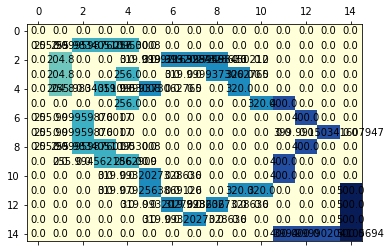

In [22]:
plot_matrix(Q)

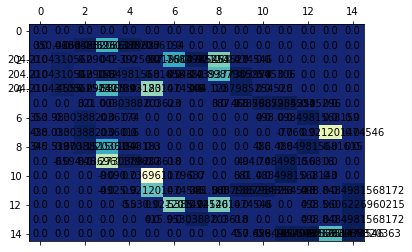

In [23]:
plot_matrix(enviornment_matrix)

In [24]:
enviornment_matrix

matrix([[    0.        ,     0.        ,     0.        ,     0.        ,
             0.        ,     0.        ,     0.        ,     0.        ,
             0.        ,     0.        ,     0.        ,     0.        ,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,   350.06303882, -4264.73696118,
           342.32303882,     0.        ,     0.        ,     0.        ,
             0.        ,     0.        ,     0.        ,     0.        ,
             0.        ,     0.        ,     0.        ],
        [    0.        ,   204.21043106,     0.        ,     0.        ,
             0.        ,     0.        , -3925.92120147,   407.76879853,
         -5500.92120147,     0.        ,     0.        ,     0.        ,
             0.        ,     0.        ,     0.        ],
        [    0.        ,   204.21043106,     0.        ,     0.        ,
           313.15849816,     0.        ,     0.        ,     0.        ,
         -4546.4393773 

In [25]:
Q

matrix([[  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        , 255.99995988, 255.98340511,
         256.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [  0.        , 204.8       ,   0.        ,   0.        ,
           0.        ,   0.        , 319.99992163, 319.99320273,
         319.99994985,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [  0.        , 204.8       ,   0.        ,   0.        ,
         256.        ,   0.        ,   0.        ,   0.        ,
         319.99993731, 320.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [  0

### Checking the route to Destinatination

In [26]:

current_state = 1
steps = [current_state]

while current_state != 14:
    print('....................................................................................')
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    print('nxt step index -> shape',next_step_index,next_step_index.shape)
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    print(' steps -> ',steps)
    current_state = next_step_index
    print(' current state -> ',current_state)
    print('....................................................................................')
print("Most efficient path:")
print(steps)

....................................................................................
nxt step index -> shape [4] (1,)
 steps ->  [1, 4]
 current state ->  4
....................................................................................
....................................................................................
nxt step index -> shape [9] (1,)
 steps ->  [1, 4, 9]
 current state ->  9
....................................................................................
....................................................................................
nxt step index -> shape [11] (1,)
 steps ->  [1, 4, 9, 11]
 current state ->  11
....................................................................................
....................................................................................
nxt step index -> shape [14] (1,)
 steps ->  [1, 4, 9, 11, 14]
 current state ->  14
....................................................................................
Most ef

## Solution 

In [27]:
print("Most efficient path:")
print(steps)

Most efficient path:
[1, 4, 9, 11, 14]
